In [162]:
import pandas as pd
import numpy as np

from numpy.random import seed

from keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
OUTPUT_PATH = './Data/output/'

### Import dataset

In [132]:
dataset = pd.read_csv(OUTPUT_PATH + 'Population_Schools_SDGs_Clean.csv')
dataset = dataset.dropna()
dataset.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft
0,PH150702001,88.0,54.0,34.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.042654,0.014218,0.085308,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449
1,PH150702002,210.0,100.0,110.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.047619,0.002976,0.011905,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554
3,PH150702005,277.0,152.0,125.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.051637,0.021411,0.040302,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092
4,PH150702006,352.0,146.0,206.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.016966,0.002994,0.023952,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657
5,PH150702007,270.0,140.0,130.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.026316,0.011696,0.023392,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509


### Preprocess data

In [133]:
SDG = dataset.iloc[:,84:]

#### 1. Elementary

In [134]:
data_elem = SDG.copy()
data_elem['NUM_SCHOOLS'] = dataset['SCH_CAT_CES'] + dataset['SCH_CAT_ES'] + dataset['SCH_CAT_PS'] + dataset['SCH_CAT_PES']
data_elem['ELEM_POPN'] = dataset['both_age_6_to_12']
len(data_elem)

1529

#### 2. High School

In [135]:
data_hs = SDG.copy()
data_hs['NUM_SCHOOLS'] = dataset['SCH_CAT_JHS'] + dataset['SCH_CAT_SHS'] + dataset['SCH_CAT_PJHS'] + dataset['SCH_CAT_PSHS']
data_hs['HS_POPN'] = dataset['both_age_13_to_16']
len(data_hs)

1529

In [136]:
training_data, testing_data = train_test_split(data_elem, test_size=0.2, random_state=42)

In [137]:
X_train = training_data.drop(['NUM_SCHOOLS'], axis=1)
y_train = training_data['NUM_SCHOOLS']

X_test = testing_data.drop(['NUM_SCHOOLS'], axis=1)
y_test = testing_data['NUM_SCHOOLS']

In [138]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [139]:
def base_model():
    model = Sequential()
    model.add(normalizer)
    model.add(Dense(4, input_dim=2, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
#     model.add(Dense(20, activation='tanh', input_dim=5, kernel_initializer='uniform'))
#     model.add(Dense(1, activation='linear', kernel_initializer='uniform'))
    
    model.compile(loss='mse', optimizer='adam')
    return model

In [170]:
model = base_model()
EPOCHS = 200
BATCH_SIZE = 10

seed(1)

history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/200
98/98 [==============================] - 1s 5ms/step - loss: 2.8369 - val_loss: 2.1154
Epoch 2/200
98/98 [==============================] - 0s 3ms/step - loss: 1.9908 - val_loss: 1.4361
Epoch 3/200
98/98 [==============================] - 0s 2ms/step - loss: 1.3058 - val_loss: 1.0163
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 1.2710 - val_loss: 0.8482
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 0.8748 - val_loss: 0.7620
Epoch 6/200
98/98 [==============================] - 0s 2ms/step - loss: 0.8328 - val_loss: 0.7045
Epoch 7/200
98/98 [==============================] - 0s 2ms/step - loss: 0.8533 - val_loss: 0.6557
Epoch 8/200
98/98 [==============================] - 0s 2ms/step - loss: 0.8948 - val_loss: 0.6218
Epoch 9/200
98/98 [==============================] - 0s 2ms/step - loss: 0.8023 - val_loss: 0.5943
Epoch 10/200
98/98 [==============================] - 0s 5ms/step - loss: 0.7730 - val_loss: 0.5779
Epoch 11/

Epoch 83/200
98/98 [==============================] - 0s 4ms/step - loss: 0.5286 - val_loss: 0.5395
Epoch 84/200
98/98 [==============================] - 0s 4ms/step - loss: 0.6258 - val_loss: 0.5504
Epoch 85/200
98/98 [==============================] - 0s 4ms/step - loss: 0.4859 - val_loss: 0.5461
Epoch 86/200
98/98 [==============================] - 0s 4ms/step - loss: 0.5598 - val_loss: 0.5473
Epoch 87/200
98/98 [==============================] - 0s 4ms/step - loss: 0.5449 - val_loss: 0.5445
Epoch 88/200
98/98 [==============================] - 0s 2ms/step - loss: 0.6304 - val_loss: 0.5416
Epoch 89/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3779 - val_loss: 0.5524
Epoch 90/200
98/98 [==============================] - 0s 2ms/step - loss: 0.4453 - val_loss: 0.5413
Epoch 91/200
98/98 [==============================] - 0s 2ms/step - loss: 0.4313 - val_loss: 0.5551
Epoch 92/200
98/98 [==============================] - 0s 2ms/step - loss: 0.5015 - val_loss: 0.5549


98/98 [==============================] - 0s 4ms/step - loss: 0.4400 - val_loss: 0.6321
Epoch 165/200
98/98 [==============================] - 0s 2ms/step - loss: 0.4940 - val_loss: 0.6339
Epoch 166/200
98/98 [==============================] - 0s 3ms/step - loss: 0.4069 - val_loss: 0.6272
Epoch 167/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5840 - val_loss: 0.6351
Epoch 168/200
98/98 [==============================] - 0s 2ms/step - loss: 0.5046 - val_loss: 0.6227
Epoch 169/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3726 - val_loss: 0.6394
Epoch 170/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3979 - val_loss: 0.6388
Epoch 171/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3777 - val_loss: 0.6301
Epoch 172/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3572 - val_loss: 0.6289
Epoch 173/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3630 - val_loss: 0.6368
Epoc

In [171]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.406211,0.662147,195
196,0.401180,0.654140,196
197,0.401624,0.674261,197
198,0.400649,0.643756,198
199,0.401009,0.659916,199


In [172]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

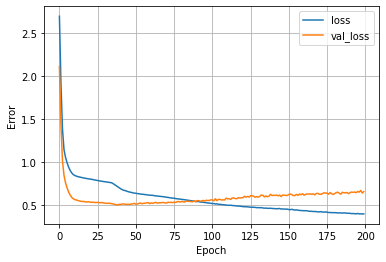

In [173]:
plot_loss(history)

In [167]:
y_pred = model.predict(X_test)

In [168]:
y_pred_round = np.round(y_pred)

In [169]:
accuracy_score(y_test, y_pred_round)

0.738562091503268

In [161]:
model.save(OUTPUT_PATH + 'REG_MODEL_ELEM')

INFO:tensorflow:Assets written to: ./Data/output/REG_MODEL_ELEM\assets


### FEATURE IMPORTANCE

In [148]:
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasRegressor

import eli5
from eli5.sklearn import PermutationImportance

In [149]:
estimator = KerasRegressor(build_fn=base_model, nb_epoch=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)
kfold = KFold(n_splits=10)

In [150]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

13/13 [==============================] - 0s 1ms/step - loss: 3.4159


In [151]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -2.01 (0.86) MSE


In [152]:
estimator.fit(X_train, y_train)

98/98 [==============================] - 2s 9ms/step - loss: 2.6205 - val_loss: 1.9016


In [153]:
perm = PermutationImportance(estimator, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

123/123 [==============================] - 0s 776us/step - loss: 1.9793


Weight,Feature
0.0175 ± 0.0052,SDG_Type_Worker_Arm
0.0143 ± 0.0093,SDG_Households_Kerosene_Gass_Light_Pct
0.0111 ± 0.0051,SDG_Type_Worker_Pro
0.0072 ± 0.0036,SDG_Type_Worker_Ser
0.0054 ± 0.0083,SDG_Type_Worker_Cra
0.0048 ± 0.0067,SDG_Type_Building_Single_Pct
0.0025 ± 0.0064,SDG_Households_Drinking_Shared_Faucet_Pct
0.0016 ± 0.0014,SDG_Type_Worker_Ele
0.0009 ± 0.0045,SDG_Households_Electricity_Light_Pct
0.0007 ± 0.0049,SDG_Type_Worker_Cle
